In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import cv2 as cv
import pywt

In [2]:
# img=cv.imread("images_data/cristiano_ronaldo/gettyimages-1323514768-612x612.jpg")
# # plt.imshow(img)
# gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


In [3]:
face_cascade = cv.CascadeClassifier('cascade_opencv/face.xml')
eye_cascade = cv.CascadeClassifier('cascade_opencv/eye.xml')

# faces = face_cascade.detectMultiScale(gray)
# faces

In [4]:
# (x,y,w,h) = faces[0]
# x,y,w,h

In [5]:
# face_img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

# roi_color = face_img[y:y+h, x:x+w]
# plt.imshow(roi_color)

In [6]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv.cvtColor( imArray,cv.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [7]:
# plt.imshow(w2d(roi_color))

In [8]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv.imread(image_path)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color


In [9]:
img_messi=get_cropped_image_if_2_eyes("images_data/lionel_messi/gettyimages-1321594791-612x612.jpg")

In [10]:
img_messi
# plt.imshow(img_messi)

## Iterating over every image and storing it in cropped folder


In [11]:
import os

celebrity_name =["lionel_messi","cristiano_ronaldo","neymar_jr"]

path_crop_folder="cropped"
path_img_folder="images_data"


In [12]:
celeb_crop_dict={"lionel_messi":[],"cristiano_ronaldo":[],"neymar_jr":[]}
if   os.path.exists(path_crop_folder):
    
#     os.mkdir(path_crop_folder)

    for celeb in celebrity_name:
        

            print("Working on " , celeb)

            for i in os.scandir(path_img_folder+"/"+celeb):
                path_img=i.path.split("/")[-1].split(celeb)[-1].replace("\\","")
                img_face=get_cropped_image_if_2_eyes(path_img_folder+"/"+celeb+"/"+path_img)
                print(img_face)
                if(type(img_face)!=type(None)):
                    

                    cropped_file_name = celeb + str(len(celeb_crop_dict.get(celeb))) + ".png"
                    cropped_file_path = path_crop_folder + "/"  +cropped_file_name
                    celeb_crop_dict[celeb].append(cropped_file_path)
                    cv.imwrite(cropped_file_path, img_face)


                    

Working on  lionel_messi
None
[[[61 69 86]
  [61 69 86]
  [61 69 86]
  ...
  [ 2  0  1]
  [ 8  5  7]
  [18 15 17]]

 [[61 69 86]
  [61 69 86]
  [61 69 86]
  ...
  [ 2  0  1]
  [ 9  6  8]
  [19 16 18]]

 [[61 69 86]
  [61 69 86]
  [61 69 86]
  ...
  [ 2  0  1]
  [ 9  6  8]
  [19 16 18]]

 ...

 [[64 80 96]
  [61 77 93]
  [57 73 89]
  ...
  [26 13 15]
  [19  7  7]
  [14  9  8]]

 [[60 73 89]
  [60 73 89]
  [59 72 88]
  ...
  [23 10 12]
  [25 13 13]
  [ 9  4  3]]

 [[64 72 89]
  [65 73 90]
  [66 74 91]
  ...
  [19  6  8]
  [28 16 16]
  [ 6  1  0]]]
[[[52 46 47]
  [52 46 47]
  [52 46 47]
  ...
  [54 48 49]
  [54 48 49]
  [54 48 49]]

 [[52 46 47]
  [52 46 47]
  [52 46 47]
  ...
  [54 48 49]
  [54 48 49]
  [54 48 49]]

 [[52 46 47]
  [52 46 47]
  [52 46 47]
  ...
  [54 48 49]
  [54 48 49]
  [54 48 49]]

 ...

 [[61 55 56]
  [61 55 56]
  [61 55 56]
  ...
  [62 56 57]
  [62 56 57]
  [62 56 57]]

 [[61 55 56]
  [61 55 56]
  [61 55 56]
  ...
  [62 56 57]
  [62 56 57]
  [62 56 57]]

 [[61 55 56]

[[[248 246 246]
  [248 246 246]
  [248 246 246]
  ...
  [247 243 249]
  [250 246 251]
  [250 244 249]]

 [[248 246 246]
  [248 246 246]
  [248 246 246]
  ...
  [237 233 239]
  [247 243 249]
  [250 243 248]]

 [[248 246 246]
  [248 246 246]
  [248 246 246]
  ...
  [235 231 237]
  [245 241 247]
  [250 243 248]]

 ...

 [[248 248 248]
  [248 248 248]
  [248 248 248]
  ...
  [252 248 247]
  [252 248 247]
  [250 248 248]]

 [[248 248 248]
  [248 248 248]
  [248 248 248]
  ...
  [252 248 247]
  [250 248 247]
  [250 248 248]]

 [[248 248 248]
  [248 248 248]
  [248 248 248]
  ...
  [250 248 247]
  [248 249 247]
  [248 248 248]]]
None
[[[ 26  23  25]
  [ 24  21  23]
  [ 21  24  28]
  ...
  [109 118 122]
  [ 96 103 106]
  [163 169 168]]

 [[ 30  25  26]
  [ 28  23  24]
  [ 21  24  28]
  ...
  [ 47  57  64]
  [136 145 148]
  [104 110 109]]

 [[ 27  27  27]
  [ 25  25  25]
  [ 24  26  27]
  ...
  [ 60  65  66]
  [ 93  98  97]
  [ 25  28  26]]

 ...

 [[ 80  66  67]
  [ 76  64  64]
  [ 60  60  60]

None
None
[[[ 74  89 108]
  [ 75  90 109]
  [ 76  90 112]
  ...
  [ 37  46  55]
  [ 47  60  68]
  [  3  17  29]]

 [[ 70  85 104]
  [ 73  88 107]
  [ 77  91 113]
  ...
  [ 32  38  43]
  [ 45  55  62]
  [ 21  32  40]]

 [[ 72  87 106]
  [ 78  93 112]
  [ 86 100 122]
  ...
  [ 44  49  52]
  [ 48  55  58]
  [ 37  47  54]]

 ...

 [[206 206 206]
  [209 209 209]
  [207 207 207]
  ...
  [178 202 244]
  [155 178 224]
  [118 141 191]]

 [[204 204 204]
  [208 208 208]
  [207 207 207]
  ...
  [192 215 253]
  [203 227 255]
  [168 192 238]]

 [[198 198 198]
  [200 200 200]
  [203 203 203]
  ...
  [165 185 243]
  [194 211 254]
  [207 225 255]]]
Working on  neymar_jr
None
[[[ 45  52  67]
  [ 57  66  80]
  [ 61  69  86]
  ...
  [ 34  34  34]
  [ 34  34  34]
  [ 34  34  34]]

 [[ 58  67  81]
  [ 47  55  72]
  [ 75  85 102]
  ...
  [ 34  34  34]
  [ 35  35  35]
  [ 35  35  35]]

 [[ 91 101 118]
  [ 67  77  94]
  [100 112 130]
  ...
  [ 34  34  34]
  [ 35  35  35]
  [ 35  35  35]]

 ...

 [[ 90  38  15]

In [23]:
# celeb_crop_dict

## Creating the features and labels

In [14]:
X=[]
y=[]

celeb_num={"lionel_messi":0,"cristiano_ronaldo":1,"neymar_jr":2}

In [15]:
for celeb,images in celeb_crop_dict.items():
#     print("Extracting " , celeb)
    for img in images:
        img_w2d=w2d(cv.imread(img))
        img_w2d=cv.resize(img_w2d,(50,50))
        img_w2d=img_w2d.ravel()
        X.append(img_w2d)
        y.append(celeb_num[celeb])

In [16]:
X

[array([  0,   0,   0, ..., 224, 113,  50], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([103, 203,   6, ...,   7, 204, 153], dtype=uint8),
 array([204, 122,   0, ...,  51,  32,  54], dtype=uint8),
 array([1, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([ 0, 88, 37, ...,  0,  0,  0], dtype=uint8),
 array([147, 140,  39, ...,  17, 198, 157], dtype=uint8),
 array([  0,   0,   0, ...,   0, 203,  51], dtype=uint8),
 array([221,  92, 105, ..., 152,  22,  33], dtype=uint8),
 array([ 92,   0,   0, ..., 251,  25,   0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([ 64, 122,  56, ..., 249, 113,  60], dtype=uint8),
 array([  0,   0,  64, ..., 128, 128,   0], dtype=uint8),
 array([  0,   1, 255, ..., 221,  77,  74], dtype=uint8),
 array([  0,   0, 103, ...,   0,   0,   0], dtype=uint8),
 array([59,  0,  0, ..., 19, 92, 92], dtype=uint8),
 array([66,  0,  0, ..., 76, 45, 18], dtype=uint8),
 array([185,  11, 191, ..., 130, 189, 187], dtype=uint8),
 array([42

In [24]:
# Function to convert image to w2d and return an array

def con_img(path):
    img=get_cropped_image_if_2_eyes(path)
    img_w2d=w2d(img)
    img_w2d=cv.resize(img_w2d,(50,50))
    return img_w2d.ravel()    

In [17]:
# from sklearn.model_selection import ShuffleSplit

# skf=ShuffleSplit(n_splits=3,test_size=0.2,random_state=38)
# X1=np.array(X)
# y=np.array(y)
# for train]_index,test_index in skf.split(X,np.array(y)):
    
#     X_train,X_test=X[train_index] , X[test_index]
#     y_train,y_test=y[train_index] , y[test_index

In [18]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)


In [19]:
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [20]:
clf.predict([X_test[0]])

array([0])

In [21]:
y_test[0]

0

In [25]:
cr7=con_img("test/cr71.jpg")

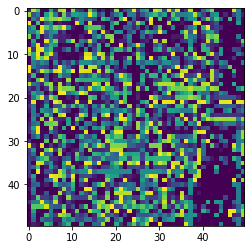

In [28]:
plt.imshow(cr7.reshape(50,50))

In [29]:
clf.predict([cr7])

array([1])